In [4]:
import pandas as pd

from Coding.day002.Exercise_1_Introduction import correlation_matrix, new_point, prediction, target

df = pd.read_csv('data/golf.csv')
df.head(10)

,Outlook,Humidity,Wind,Temperature C,Temperature F,Play
0,sunny,85.0,False,29.5,85.0,False
1,sunny,90.0,True,26.5,80.0,False
2,overcast,78.0,False,28.5,83.0,True
3,rain,96.0,False,21.0,70.0,True
4,rain,80.0,False,20.0,68.0,True
5,rain,70.0,True,18.5,65.0,False
6,overcast,65.0,True,18.0,64.0,True
7,sunny,95.0,False,22.0,72.0,False
8,sunny,70.0,False,20.5,69.0,True
9,rain,80.0,False,24.0,75.0,True


In [7]:
#display a row
df['Wind']

0     False
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8     False
9     False
10     True
11     True
12    False
13     True
14      NaN
Name: Wind, dtype: object

## Data Overview

In [8]:
print('Dataset Info')
df.info()

Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Outlook        15 non-null     object 
 1   Humidity       15 non-null     float64
 2   Wind           14 non-null     object 
 3   Temperature C  15 non-null     float64
 4   Temperature F  15 non-null     float64
 5   Play           15 non-null     bool   
dtypes: bool(1), float64(3), object(2)
memory usage: 743.0+ bytes


In [11]:
print('Missing values:')
print(df.isnull().sum())

Missing values:
Outlook          0
Humidity         0
Wind             1
Temperature C    0
Temperature F    0
Play             0
dtype: int64


In [13]:
df = df.dropna()

print('Dataset Info')
df.info()


Dataset Info
<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Outlook        14 non-null     object 
 1   Humidity       14 non-null     float64
 2   Wind           14 non-null     object 
 3   Temperature C  14 non-null     float64
 4   Temperature F  14 non-null     float64
 5   Play           14 non-null     bool   
dtypes: bool(1), float64(3), object(2)
memory usage: 686.0+ bytes


In [14]:
df['Wind'] = df['Wind'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Outlook        14 non-null     object 
 1   Humidity       14 non-null     float64
 2   Wind           14 non-null     bool   
 3   Temperature C  14 non-null     float64
 4   Temperature F  14 non-null     float64
 5   Play           14 non-null     bool   
dtypes: bool(2), float64(3), object(1)
memory usage: 588.0+ bytes


## Encoding Categorical Variables

In [16]:
df['Outlook_Int'] = df['Outlook'].astype('category').cat.codes
df.head()

,Outlook,Humidity,Wind,Temperature C,Temperature F,Play,Outlook_Int
0,sunny,85.0,False,29.5,85.0,False,2
1,sunny,90.0,True,26.5,80.0,False,2
2,overcast,78.0,False,28.5,83.0,True,0
3,rain,96.0,False,21.0,70.0,True,1
4,rain,80.0,False,20.0,68.0,True,1


In [20]:
df.nunique()

Outlook           3
Humidity          9
Wind              2
Temperature C    12
Temperature F    12
Play              2
Outlook_Int       3
dtype: int64

In [21]:
df = pd.get_dummies(df, columns=['Outlook'], prefix='Outlook')
df.head()

,Humidity,Wind,Temperature C,Temperature F,Play,Outlook_Int,Outlook_overcast,Outlook_rain,Outlook_sunny
0,85.0,False,29.5,85.0,False,2,False,False,True
1,90.0,True,26.5,80.0,False,2,False,False,True
2,78.0,False,28.5,83.0,True,0,True,False,False
3,96.0,False,21.0,70.0,True,1,False,True,False
4,80.0,False,20.0,68.0,True,1,False,True,False


In [22]:
df = df.drop(columns=['Outlook_Int'])
df.head()

,Humidity,Wind,Temperature C,Temperature F,Play,Outlook_overcast,Outlook_rain,Outlook_sunny
0,85.0,False,29.5,85.0,False,False,False,True
1,90.0,True,26.5,80.0,False,False,False,True
2,78.0,False,28.5,83.0,True,True,False,False
3,96.0,False,21.0,70.0,True,False,True,False
4,80.0,False,20.0,68.0,True,False,True,False


In [23]:
df.groupby('Play')['Humidity'].mean()

Play
False    84.000000
True     78.222222
Name: Humidity, dtype: float64

In [26]:
df.groupby('Wind')["Temperature C"].mean()

Wind
False    24.0625
True     21.7500
Name: Temperature C, dtype: float64

In [34]:
df[df['Wind']]

,Humidity,Wind,Temperature C,Temperature F,Play,Outlook_overcast,Outlook_rain,Outlook_sunny
1,90.0,True,26.5,80.0,False,False,False,True
5,70.0,True,18.5,65.0,False,False,True,False
6,65.0,True,18.0,64.0,True,True,False,False
10,70.0,True,24.0,75.0,True,False,False,True
11,90.0,True,22.0,72.0,True,True,False,False
13,80.0,True,21.5,71.0,False,False,True,False


In [35]:
df[df['Temperature C'] >= 22]

,Humidity,Wind,Temperature C,Temperature F,Play,Outlook_overcast,Outlook_rain,Outlook_sunny
0,85.0,False,29.5,85.0,False,False,False,True
1,90.0,True,26.5,80.0,False,False,False,True
2,78.0,False,28.5,83.0,True,True,False,False
7,95.0,False,22.0,72.0,False,False,False,True
9,80.0,False,24.0,75.0,True,False,True,False
10,70.0,True,24.0,75.0,True,False,False,True
11,90.0,True,22.0,72.0,True,True,False,False
12,75.0,False,27.0,81.0,True,True,False,False


In [36]:
df[df['Humidity'] == 90]

,Humidity,Wind,Temperature C,Temperature F,Play,Outlook_overcast,Outlook_rain,Outlook_sunny
1,90.0,True,26.5,80.0,False,False,False,True
11,90.0,True,22.0,72.0,True,True,False,False


## Identifying Feature Correlations

In [40]:
correlation_matrix = df.corr()
print(correlation_matrix.round(3))

                  Humidity   Wind  Temperature C  Temperature F   Play  \
Humidity             1.000 -0.254          0.246          0.273 -0.292   
Wind                -0.254  1.000         -0.327         -0.329 -0.258   
Temperature C        0.246 -0.327          1.000          0.999 -0.113   
Temperature F        0.273 -0.329          0.999          1.000 -0.121   
Play                -0.292 -0.258         -0.113         -0.121  1.000   
Outlook_overcast    -0.219  0.091          0.145          0.143  0.471   
Outlook_rain         0.072 -0.043         -0.441         -0.444 -0.067   
Outlook_sunny        0.135 -0.043          0.304          0.309 -0.378   

                  Outlook_overcast  Outlook_rain  Outlook_sunny  
Humidity                    -0.219         0.072          0.135  
Wind                         0.091        -0.043         -0.043  
Temperature C                0.145        -0.441          0.304  
Temperature F                0.143        -0.444          0.309  
Pla

In [43]:
df = df.drop(columns = ['Temperature F'])

df.head()

,Humidity,Wind,Temperature C,Play,Outlook_overcast,Outlook_rain,Outlook_sunny
0,85.0,False,29.5,False,False,False,True
1,90.0,True,26.5,False,False,False,True
2,78.0,False,28.5,True,True,False,False
3,96.0,False,21.0,True,False,True,False
4,80.0,False,20.0,True,False,True,False


## $k$-NN

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate toy dataset (manually defined)
toy_data = {
    'X1':[1, 2, 3, 6, 7, 8],
    'X2':[1, 2, 3, 6, 7, 8],
    'y': [0, 0, 0, 1, 1, 1]
}

toy_df = pd.DataFrame(data= toy_data)
toy_df.head()

,X1,X2,y
0,1,1,0
1,2,2,0
2,3,3,0
3,6,6,1
4,7,7,1


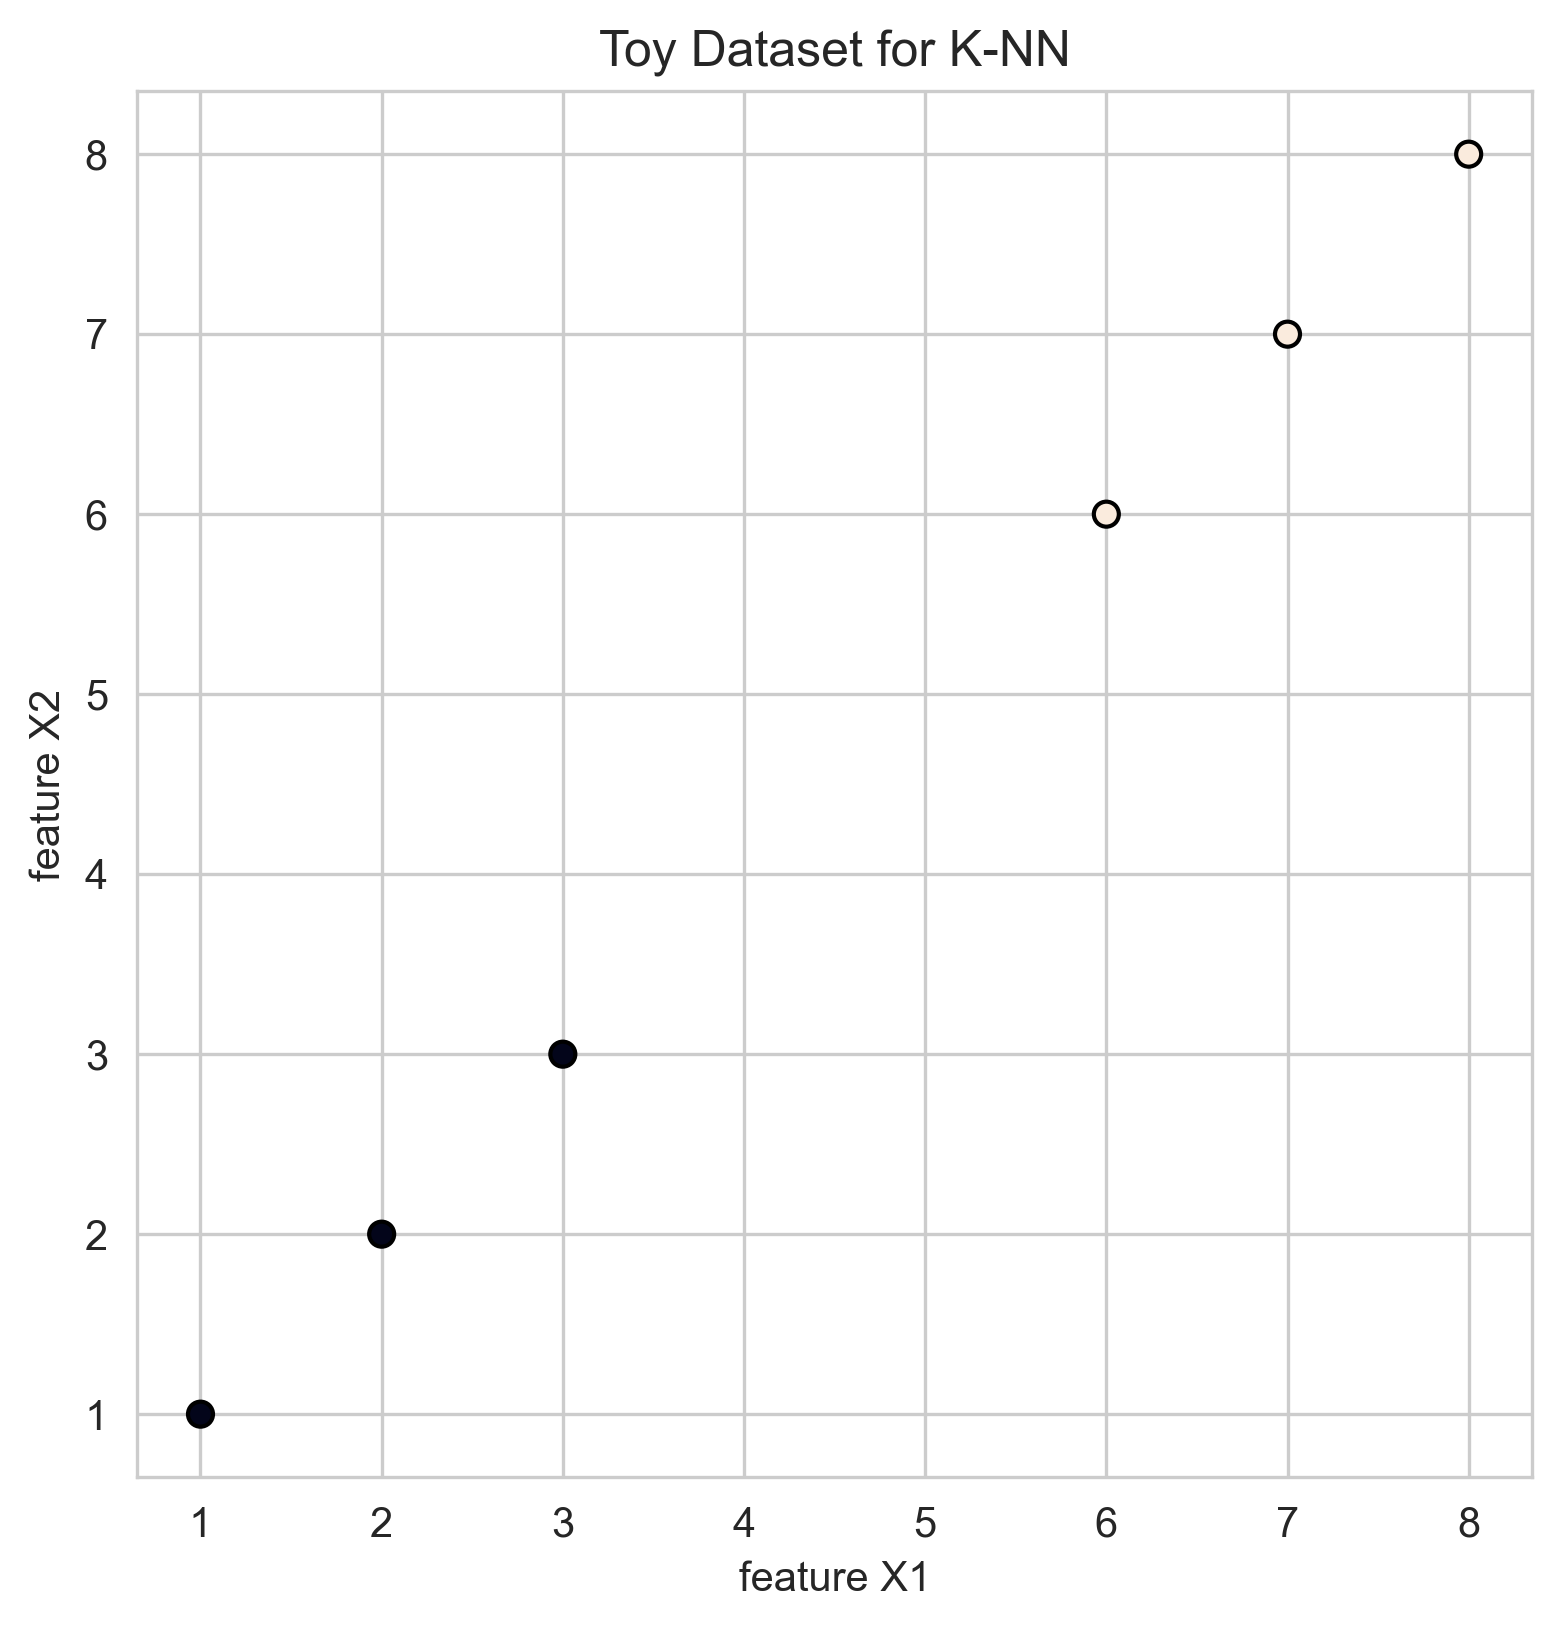

In [59]:
plt.figure(figsize=(6,6))
plt.rcParams['figure.dpi'] = 150
plt.scatter(toy_df['X1'], toy_df['X2'], c= toy_df['y'], edgecolors='black')

plt.xlabel('feature X1')
plt.ylabel('feature X2')
plt.title('Toy Dataset for K-NN')
plt.show()

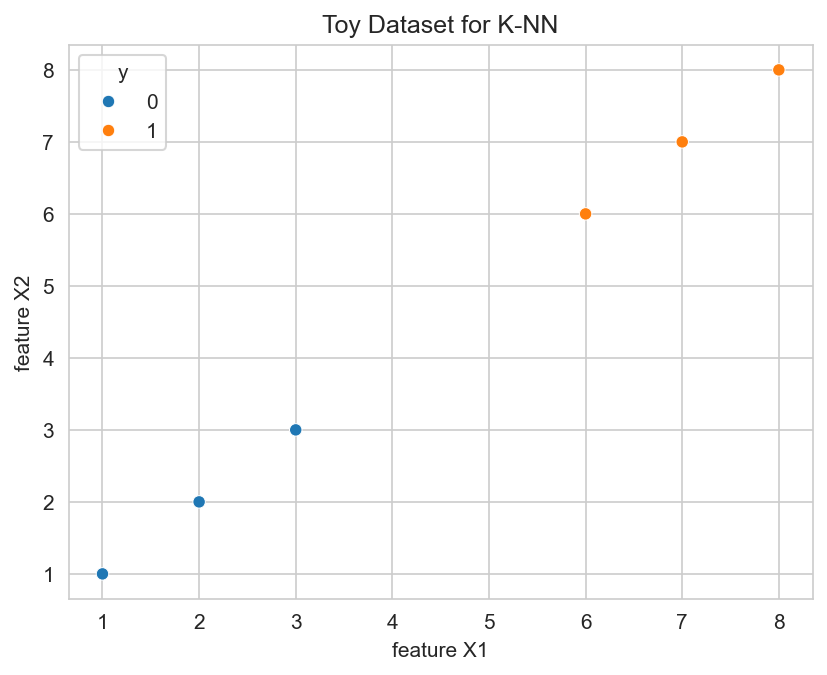

In [60]:
import seaborn as sns
plt.rcParams['figure.dpi'] = 150 ##提高图片的分辨率
sns.scatterplot(data=toy_df, x='X1', y='X2', hue='y')
plt.xlabel('feature X1')
plt.ylabel('feature X2')
plt.title('Toy Dataset for K-NN')
plt.show()


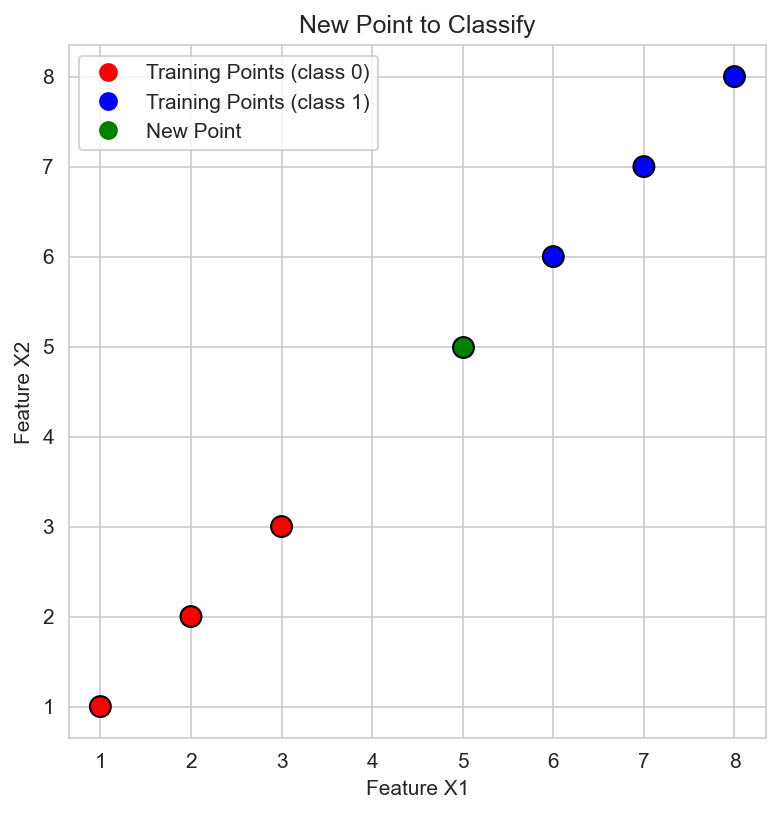

In [65]:
new_point = np.array([[5, 5]])

colors = ['red' if label == 0 else 'blue' for label in toy_df['y']]
plt.figure(figsize=(6,6))
plt.scatter(toy_df['X1'], toy_df['X2'],c=colors, edgecolors='black', s= 100, label= "Training Points")

plt.scatter(new_point[0,0], new_point[0,1], color = "green", edgecolors='black', s= 100, label='New Point')

plt.xlabel('Feature X1')
plt.ylabel('Feature X2')

plt.legend([plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10)],
           ['Training Points (class 0)', 'Training Points (class 1)', "New Point"])


plt.title("New Point to Classify")
plt.show()

In [66]:
from sklearn.neighbors import KNeighborsClassifier

X = toy_df[['X1','X2']]
y = toy_df['y']
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

new_point_df = pd.DataFrame(new_point, columns=['X1','X2'])

prediction = knn.predict(new_point_df)

print(f"Scikit-Learn Predicted Class: {prediction[0]}")

Scikit-Learn Predicted Class: 1


In [67]:
df.head()

,Humidity,Wind,Temperature C,Play,Outlook_overcast,Outlook_rain,Outlook_sunny
0,85.0,False,29.5,False,False,False,True
1,90.0,True,26.5,False,False,False,True
2,78.0,False,28.5,True,True,False,False
3,96.0,False,21.0,True,False,True,False
4,80.0,False,20.0,True,False,True,False


In [68]:
target = df['Play']

df= df.drop(columns=['Play'])

df.head()

,Humidity,Wind,Temperature C,Outlook_overcast,Outlook_rain,Outlook_sunny
0,85.0,False,29.5,False,False,True
1,90.0,True,26.5,False,False,True
2,78.0,False,28.5,True,False,False
3,96.0,False,21.0,False,True,False
4,80.0,False,20.0,False,True,False


In [69]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(df, target)


KNeighborsClassifier(n_neighbors=3)

In [72]:
df_test = pd.read_csv('data/golf_test.csv')

df_test = df_test.drop(columns= ['Temperature F'])

df_test = pd.get_dummies(df_test, columns=['Outlook'], prefix='Outlook')

df_test.head()

,Humidity,Wind,Temperature C,Outlook_overcast,Outlook_rain,Outlook_sunny
0,80.0,False,28.5,False,False,True
1,84.0,False,24.0,False,True,False
2,80.0,True,22.5,True,False,False


In [73]:
knn.predict(df_test)

array([ True,  True,  True])